In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('Train_data.csv')
test_df=pd.read_csv('Test_data.csv')
train_df3=train_df.copy()
test_df3=test_df.copy()

In [3]:
# Set options to display more rows and columns
pd.set_option('display.max_rows', None)  # Show all rows (or specify a number)
pd.set_option('display.max_columns', None)  # Show all columns (or specify a number)

## Data Exploration

In [4]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
columns1 = ["protocol_type","service","flag", "wrong_fragment", "src_bytes","dst_bytes","class"]
columns2 = ["protocol_type","service","flag", "wrong_fragment", "src_bytes","dst_bytes"]

In [6]:
train_df = train_df3[columns1]
test_df = test_df3[columns2]
train_df.head(5)

,protocol_type,service,flag,wrong_fragment,src_bytes,dst_bytes,class
0,tcp,ftp_data,SF,0,491,0,normal
1,udp,other,SF,0,146,0,normal
2,tcp,private,S0,0,0,0,anomaly
3,tcp,http,SF,0,232,8153,normal
4,tcp,http,SF,0,199,420,normal


In [7]:
train_df.head(5)

,protocol_type,service,flag,wrong_fragment,src_bytes,dst_bytes,class
0,tcp,ftp_data,SF,0,491,0,normal
1,udp,other,SF,0,146,0,normal
2,tcp,private,S0,0,0,0,anomaly
3,tcp,http,SF,0,232,8153,normal
4,tcp,http,SF,0,199,420,normal


In [8]:
train_df2=train_df.copy()
test_df2=test_df.copy()

In [9]:
train_df.shape

(25192, 7)

In [10]:
test_df.shape

(22544, 6)

In [11]:
test_df.head()

,protocol_type,service,flag,wrong_fragment,src_bytes,dst_bytes
0,tcp,private,REJ,0,0,0
1,tcp,private,REJ,0,0,0
2,tcp,ftp_data,SF,0,12983,0
3,icmp,eco_i,SF,0,20,0
4,tcp,telnet,RSTO,0,0,15


In [12]:
train_df.info

<bound method DataFrame.info of       protocol_type      service    flag  wrong_fragment  src_bytes  \
0               tcp     ftp_data      SF               0        491   
1               udp        other      SF               0        146   
2               tcp      private      S0               0          0   
3               tcp         http      SF               0        232   
4               tcp         http      SF               0        199   
5               tcp      private     REJ               0          0   
6               tcp      private      S0               0          0   
7               tcp      private      S0               0          0   
8               tcp   remote_job      S0               0          0   
9               tcp      private      S0               0          0   
10              tcp      private     REJ               0          0   
11              tcp      private      S0               0          0   
12              tcp         http      SF     

In [13]:
train_df.describe()

,wrong_fragment,src_bytes,dst_bytes
count,25192.000000,2.519200e+04,2.519200e+04
mean,0.023738,2.433063e+04,3.491847e+03
std,0.260221,2.410805e+06,8.883072e+04
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,4.400000e+01,0.000000e+00
75%,0.000000,2.790000e+02,5.302500e+02
max,3.000000,3.817091e+08,5.151385e+06


## Data Preprocessing

### Outlier Treatment

In [14]:
# To check if the training and testing data contains any null values or not
train_df.isnull().sum()

protocol_type     0
service           0
flag              0
wrong_fragment    0
src_bytes         0
dst_bytes         0
class             0
dtype: int64

In [15]:
test_df.isnull().sum()

protocol_type     0
service           0
flag              0
wrong_fragment    0
src_bytes         0
dst_bytes         0
dtype: int64

In [16]:
# To check if the dataset contains any duplicate value
train_df.duplicated().any()

True

## Exploratory Data Analysis

In [17]:
# Selecting categorical features
cat_features = train_df.select_dtypes(include = 'object')
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

### Data visualization

<Axes: xlabel='class', ylabel='count'>

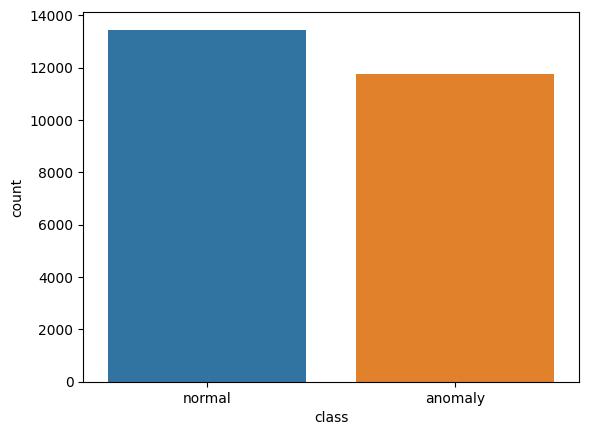

In [18]:
# Visualizing the Target Variable Class
sns.countplot(data = train_df, x = 'class')

In [19]:
train_df['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

<Axes: xlabel='protocol_type', ylabel='count'>

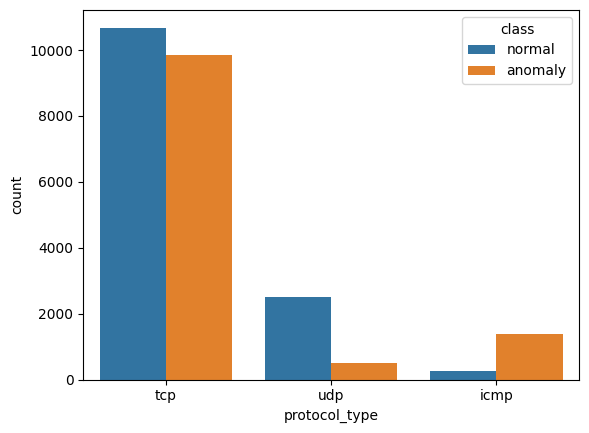

In [20]:
# Visualizing thecountplot for each protocol type with class being the hue
sns.countplot(data = train_df, x ='protocol_type', hue = 'class')

In [21]:
train_df.service.nunique()

66

<Axes: xlabel='flag', ylabel='count'>

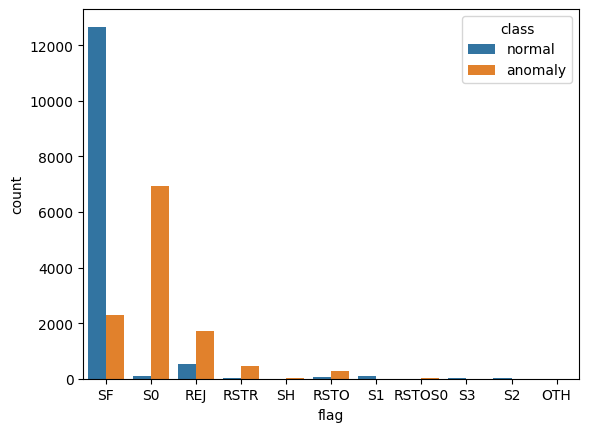

In [22]:
sns.countplot(data = train_df, x = 'flag', hue = 'class')

### Numerical Features

In [23]:
# Mapping Target Variable 0 for normal and 1 for anomaly
labels ={'normal':0,'anomaly':1}
train_df['labels'] = train_df['class'].map(labels)

In [24]:
train_df.shape

(25192, 8)

In [25]:
# Viewing the encoded output labels
train_df[['class','labels']].head()

,class,labels
0,normal,0
1,normal,0
2,anomaly,1
3,normal,0
4,normal,0


In [26]:
num_features = train_df.select_dtypes(include = ['int64','float64'])

In [27]:
num_features.columns# Numerical feature columns

Index(['wrong_fragment', 'src_bytes', 'dst_bytes', 'labels'], dtype='object')

### Correlation of other attributes with the label

In [28]:
num_features.corr()['labels'].sort_values(ascending=False)

labels            1.000000
wrong_fragment    0.097625
src_bytes         0.005743
dst_bytes        -0.010949
Name: labels, dtype: float64

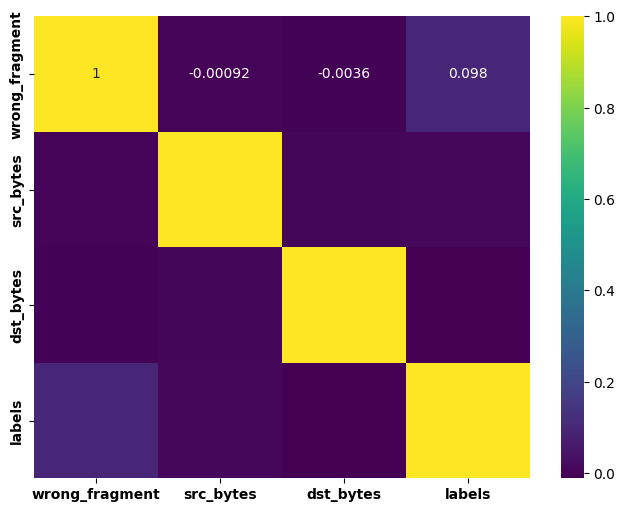

In [29]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=num_features.corr(), cmap='viridis', annot=True)


# Make x-tick and y-tick labels bold
ax = plt.gca()  # Get current axis
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()


In [30]:
# # Calculating the correlation matrix
# correlation_matrix = num_features.corr()

# # Setting threshold for strong correlation
# threshold = 0.90

# # Finding pairs of correlated features
# strong_correlations = []

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > threshold:
#             strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# # Convert to DataFrame for better readability
# strong_correlations_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

# strong_correlations_df

In [31]:
# strong_correlations_list = list(strong_correlations_df['Feature 1'])
# strong_correlations_list

In [32]:
# train_df = train_df.drop(strong_correlations_list, axis = 1)

In [33]:
train_df.shape

(25192, 8)

In [34]:
train_df['service'].nunique() #The service column has alot of unique values that might 
#seem irrelavant to our model. So we are dropping it.

66

In [35]:
train_df = train_df.drop('service', axis = 1)

In [36]:
# test_df = test_df.drop(strong_correlations_list, axis = 1)

In [37]:
test_df = test_df.drop('service', axis = 1)

In [38]:
test_df.shape


(22544, 5)

## Feature Engineering

In [39]:
train_df = train_df.drop('class', axis = 1)

In [40]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [41]:
train_dummies = pd.get_dummies(train_df[['protocol_type','flag']], dtype=int, drop_first=True )

In [42]:
train_df.drop(['protocol_type','flag'], axis =1, inplace = True)

train_df = pd.concat([train_df, train_dummies], axis =1)

In [43]:
train_df.head()

,wrong_fragment,src_bytes,dst_bytes,labels,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,1,0,0,0,0,0,0,0,0,0,1,0


In [44]:
test_dummies = pd.get_dummies(test_df[['protocol_type','flag']], dtype=int,drop_first=True )

In [45]:
test_df.drop(['protocol_type','flag'], axis =1, inplace = True)

test_df = pd.concat([test_df, test_dummies], axis = 1)

## Model Development

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
scaler=MinMaxScaler()

### 1. Logistic Regression

In [48]:
log_model = LogisticRegression()

In [49]:
x = train_df.drop('labels', axis = 1)

In [50]:
y = train_df['labels']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [52]:
x_train = scaler.fit_transform(x_train)

In [53]:
x_test = scaler.transform(x_test)

In [54]:
# Training the model
log_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
predictions=log_model.predict(x_test)
predictions# predicting on new data

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [56]:
# Going through the Precision, Recall and F1 score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4057
           1       0.92      0.94      0.93      3501

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558



### 2. Artificial Neural Networks (ANN)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
# Artificial Neural Network using Neurons
ann_model = Sequential()

ann_model.add(Dense(64, activation = 'relu',input_shape=(x_train.shape[1],)))
ann_model.add(Dropout(0.5))

ann_model.add(Dense(32, activation = 'relu'))
ann_model.add(Dropout(0.5))

# For Binary Classification
ann_model.add(Dense(1, activation = 'sigmoid'))

ann_model.compile(loss = 'binary_crossentropy', optimizer ='adam')

In [59]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)

In [60]:
ann_model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = 50, callbacks = [early_stop])

Epoch 1/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4382 - val_loss: 0.2244
Epoch 2/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2516 - val_loss: 0.2189
Epoch 3/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2364 - val_loss: 0.2179
Epoch 4/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2346 - val_loss: 0.2181
Epoch 5/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2315 - val_loss: 0.2194
Epoch 6/50
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2318 - val_loss: 0.2182
Epoch 6: early stopping


In [61]:
loss = pd.DataFrame(ann_model.history.history)
loss.head()

,loss,val_loss
0,0.330779,0.224437
1,0.244778,0.218912
2,0.236355,0.217857
3,0.233020,0.218139
4,0.230368,0.219393


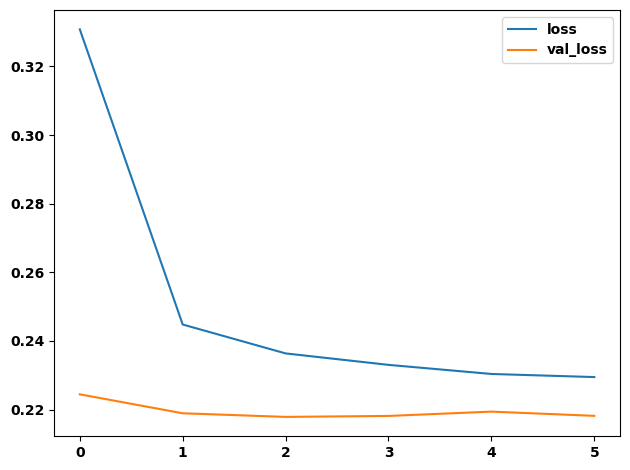

In [62]:
import matplotlib.pyplot as plt

# Plotting the loss (assuming loss is a pandas Series)
ax = loss.plot(label='Training Loss')

# Make x-tick and y-tick labels bold
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Add a legend with bold font
ax.legend(prop={'weight': 'bold'})

plt.tight_layout()
plt.show()



In [63]:
# y_pred_proba = ann_model.predict(x_test)
# y_pred = (y_pred_proba > 0.8).astype(int)  # Adjusted threshold as needed

In [64]:
# y_pred

In [65]:
# print(classification_report(y_test, y_pred))

### Model Comparison

In [66]:
# #Based on the overall performances of the two models, the ANN model performed better
# metrics = ['Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)', 'Accuracy']
# ann_result = [0.97, 1.00, 1.00, 0.97, 0.99, 0.98, 0.98]
# log_result = [0.95, 0.96, 0.97, 0.94, 0.96, 0.95, 0.96]

# # Create bar positions
# bar_width = 0.35
# index = np.arange(len(metrics))

# # Create the bar chart
# fig, ax = plt.subplots(figsize=(12, 6))

# custom_colors = ['#0D261E', '#319B79']

# # Plot bars for each set
# bars1 = ax.bar(index, ann_result, bar_width, label='ANN', color=custom_colors[0])
# bars2 = ax.bar(index + bar_width, log_result, bar_width, label='Log', color=custom_colors[1])

# # Add labels, title, and legend
# ax.set_xlabel('Metrics', fontweight='bold')
# ax.set_ylabel('Scores', fontweight='bold')
# ax.set_title('Comparison of Model Results',fontweight='bold')
# ax.set_xticks(index + bar_width / 2)
# ax.set_xticklabels(metrics, rotation=90)

# # Make x-tick and y-tick labels bold
# ax.tick_params(axis='x', labelsize=10, labelrotation=90, width=2)
# ax.tick_params(axis='y', labelsize=10, width=2)

# for label in ax.get_xticklabels() + ax.get_yticklabels():
#     label.set_fontweight('bold')

# ax.legend()

# # Set y-axis limits
# plt.ylim(0, 1.2)
# plt.tight_layout()
# plt.show()


## Model Performance on test dataset

### ANN model

In [67]:
x_train = train_df.drop('labels', axis = 1).values
y_train = train_df['labels'].values

In [68]:
# x_test_df=test_df.values
# x_test_df

In [69]:
# x_train =scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test_df)

In [70]:
# # ANN Model
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))  # Add input shape
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))  # For binary classification

In [71]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
# model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks = [early_stop]) 

In [73]:
# test_pred=model.predict(x_test)
# test_pred=(test_pred>0.8).astype(int)

In [74]:
# test_pred #Test data predictions

In [75]:
# exporting the predicted values to a csv file
# predictions_df = pd.DataFrame(test_pred, columns = ['Predicted_Labels'])
# predictions_df.head()

In [76]:
# predictions_df.to_csv('predicted_output_values.csv', index = False)

In [77]:
test_df2.head(2)

,protocol_type,service,flag,wrong_fragment,src_bytes,dst_bytes
0,tcp,private,REJ,0,0,0
1,tcp,private,REJ,0,0,0


In [78]:
# Most correlated columns with being anomaly
columns2 = ["protocol_type","service","flag", "wrong_fragment", "src_bytes","dst_bytes"]

final_temp_df = train_df3[columns2]
final_temp_df.head()

,protocol_type,service,flag,wrong_fragment,src_bytes,dst_bytes
0,tcp,ftp_data,SF,0,491,0
1,udp,other,SF,0,146,0
2,tcp,private,S0,0,0,0
3,tcp,http,SF,0,232,8153
4,tcp,http,SF,0,199,420


In [79]:
# final_data_df = pd.concat([final_temp_df, predictions_df], axis=1, ignore_index=False)
# final_data_df.head(2)

In [80]:
# final_data_df.to_csv('Final_Prediction.csv', index = False)

In [81]:
x_train[0]

array([  0, 491,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   0], dtype=int64)

In [82]:
x_train.shape

(25192, 15)

## Using GridSearchCV to hyper tune the parameters of differnt models and select the best model and parameters 

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [84]:
model_params = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1, 10],  # Reduced range
            'kernel': ['rbf', 'linear']  # Removed 'poly'
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5, 10],  # Removed smallest value
            "criterion": ["gini", "entropy"]  # Removed 'log_loss'
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5]  # Reduced range
        }
    },
    'decision_tree': {  # Renamed to standard convention
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],  # Removed 'log_loss'
            "splitter": ["best"]  # Removed 'random'
        }
    },
    "gaussian_nb": {  # Renamed to standard convention
        "model": GaussianNB(),
        "params": {
            "var_smoothing": [1e-7, 1e-8]   # Narrowed down range
        }
    }        
}

In [85]:
# model_params = {
#     'svc': {
#         'model': SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20,30,40,50],
#             'kernel': ['rbf','linear',"poly"]
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10],
#             "criterion":["gini", "entropy", "log_loss"]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10],
#         }
#     },
#     'Decision_tree':{
#         "model": DecisionTreeClassifier(),
#         "params":{
#             "criterion":["gini", "entropy", "log_loss"],
#             "splitter" :["best", "random"]
#         }
#     },
#     "Gaussian_Nb" :{
#         "model":GaussianNB(),
#         "params":{
#           "var_smoothing":[0.0000001,0.000000001,0.0000000000000001]
#         }
#    }        
# }

In [86]:
scores=[]

In [87]:
# for model,mp in model_params.items():
#     clf=GridSearchCV(mp["model"],mp["params"],cv=4)
#     clf.fit(x_train,y_train)
#     scores.append({
#         "model":model,
#         "best_score":clf.best_score_,
#         "best_params":clf.best_params_})

In [88]:
# df_final=pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df_final

In [89]:
x.head()

,wrong_fragment,src_bytes,dst_bytes,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,1,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,1,0,0,0,0,0,0,0,0,0,1,0


In [90]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: labels, dtype: int64

## LazyClassifier provides a superficial overview of model performance. It is a tool designed for quick and initial benchmarking of various machine learning algorithms.

In [91]:
# from lazypredict.Supervised import  LazyClassifier
# clf = LazyClassifier(predictions=True)
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# models, predictions = clf.fit(x_train, x_test, y_train, y_test)

In [92]:
 # models

In [93]:
# # Extract top 10 models by accuracy
# top_models = models.sort_values(by="Accuracy", ascending=False).head(10)

# # Plot the accuracies
# plt.figure(figsize=(10, 6))
# sns.barplot(x=top_models.index, y="Accuracy", data=top_models, palette="viridis")
# plt.title("Model Accuracy Comparison predicted by LazyClassifier ")
# plt.ylabel("Accuracy")
# plt.xlabel("Model")
# plt.xticks(rotation=45)
# plt.show()

### Various Model training

In [94]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
x_train.shape

(25192, 15)

## dumpong the scaler

In [96]:
# # Save the scaler
# dump(scaler, 'scaler.joblib')

## SVC

In [97]:
svc_model = SVC(C=1.0,kernel='rbf')
svc_model.fit(x_train,y_train)

SVC()

In [98]:
svc_predictions=svc_model.predict(x_test)
svc_predictions# predicting on new data

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [99]:
# Going through the Precision, Recall and F1 score
print(classification_report(y_test, svc_predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4057
           1       0.92      0.92      0.92      3501

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558



In [100]:
from joblib import dump, load

# Suppose this is your trained SVM model
# from sklearn.svm import SVC
# svm_model = SVC().fit(X_train, y_train)

# Save the model
dump(svc_model, 'svm_model.joblib')

['svm_model.joblib']

## Random Forest

In [101]:
Rf_model = RandomForestClassifier(criterion='log_loss', n_estimators=5)
Rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=5)

In [102]:
Rf_predictions=Rf_model.predict(x_test)
Rf_predictions# predicting on new data

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [103]:
# Going through the Precision, Recall and F1 score
print(classification_report(y_test, Rf_predictions))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83      4057
           1       0.76      0.96      0.85      3501

    accuracy                           0.84      7558
   macro avg       0.86      0.85      0.84      7558
weighted avg       0.87      0.84      0.84      7558



## Decision_tree

In [104]:
Decision_tree_model = DecisionTreeClassifier(criterion= 'log_loss', splitter= 'random')
Decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', splitter='random')

In [105]:
Decision_tree_predictions=Decision_tree_model.predict(x_test)
Decision_tree_predictions# predicting on new data

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [106]:
# Going through the Precision, Recall and F1 score
print(classification_report(y_test, Decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83      4057
           1       0.76      0.96      0.85      3501

    accuracy                           0.84      7558
   macro avg       0.86      0.85      0.84      7558
weighted avg       0.87      0.84      0.84      7558



## Gaussian_Nb

In [107]:
Gaussian_Nb_model= GaussianNB(var_smoothing= 1e-07)
Gaussian_Nb_model.fit(x_train,y_train)

GaussianNB(var_smoothing=1e-07)

In [108]:
Gaussian_Nb_predictions=Gaussian_Nb_model.predict(x_test)
Gaussian_Nb_predictions# predicting on new data

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [109]:
print(classification_report(y_test, Gaussian_Nb_predictions))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4057
           1       0.98      0.68      0.80      3501

    accuracy                           0.85      7558
   macro avg       0.88      0.84      0.84      7558
weighted avg       0.87      0.85      0.84      7558



## Model Comparison

In [110]:
# metrics = ['Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1-Score (Class 0)', 'F1-Score (Class 1)']
# Svc_result = [0.94, 0.92, 0.93, 0.93, 0.93, 0.93]
# Rf_result = [0.97, 0.93, 0.93, 0.97, 0.95, 0.95]
# Dt_result = [0.99, 0.94, 0.94, 0.99, 0.97, 0.96]
# log_result = [0.95, 0.96, 0.97, 0.94, 0.96, 0.95]
# Gnb_result = [0.78, 0.97, 0.98, 0.69, 0.87, 0.81]

# # Create bar positions
# bar_width = 0.17
# index = np.arange(len(metrics))

# # Create the bar chart
# fig, ax = plt.subplots(figsize=(35, 15))

# # custom_colors = ['##9a766f', '#876761','#4d3b37', '#319B79','#0D261E']
# custom_colors = ['#9a766f', '#604a45','#3a2c2a', '#261d1c','#130f0e']

# # Plot bars for each set
# bars1 = ax.bar(index, Svc_result, bar_width, label='SVC', color=custom_colors[0])
# bars2 = ax.bar(index + bar_width, Rf_result, bar_width, label='Rf', color=custom_colors[1])
# bars3 = ax.bar(index + bar_width+ bar_width, Dt_result, bar_width, label='Dt', color=custom_colors[2])
# bars4 = ax.bar(index + bar_width+ bar_width+ bar_width, log_result, bar_width, label='Log_reg', color=custom_colors[3])
# bars5 = ax.bar(index + bar_width+ bar_width+ bar_width+ bar_width, Gnb_result, bar_width, label='Gnb', color=custom_colors[4])

# # Add labels, title, and legend
# ax.set_xlabel('Metrics', fontweight='bold',fontsize=25)
# ax.set_ylabel('Scores', fontweight='bold',fontsize=25)
# ax.set_title('Comparison of Model Results',fontweight='bold',fontsize=25)
# ax.set_xticks(index + bar_width / 2)
# ax.set_xticklabels(metrics, rotation=90)

# # Make x-tick and y-tick labels bold
# ax.tick_params(axis='x', labelsize=25, labelrotation=90, width=3)
# ax.tick_params(axis='y', labelsize=25, width=2)

# for label in ax.get_xticklabels() + ax.get_yticklabels():
#     label.set_fontweight('bold')

# ax.legend(fontsize=18)

# # Set y-axis limits
# plt.ylim(0, 1.2)
# plt.tight_layout()
# plt.show()

In [111]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

ann_intrusion_model = keras.Sequential([
    Dense(256, input_shape=(x_train.shape[1],), activation="relu"),
    Dropout(0.3),  # Dropout to prevent overfitting
    
    Dense(128, activation="relu"),
    Dropout(0.3),
    
    Dense(64, activation="relu"),
    Dropout(0.3),
    
    Dense(32, activation="relu"),
    Dropout(0.2),
    
    Dense(16, activation="relu"),
    Dense(8, activation="relu"),  # Additional smaller layer to refine learning
    
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

ann_intrusion_model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

ann_intrusion_model.fit(x_train,y_train,epochs=15)     

Epoch 1/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8876 - loss: 0.3119
Epoch 2/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9316 - loss: 0.2263
Epoch 3/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9333 - loss: 0.2188
Epoch 4/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9352 - loss: 0.2240
Epoch 5/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9349 - loss: 0.2155
Epoch 6/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9346 - loss: 0.2158
Epoch 7/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9352 - loss: 0.2132
Epoch 8/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9354 - loss: 0.2144
Epoch 9/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9336 - loss: 0.2175
Epoch 10/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9329 - loss: 0.2120
Epoch 11/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9345 - loss: 0.2166
Epoch 12/15
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [112]:
test_pred=ann_intrusion_model.predict(x_test)
test_pred=(test_pred>0.8).astype(int)

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [113]:
test_pred[5:10]

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [114]:
y_test[5:10]

534      1
11183    0
1417     0
18194    1
530      1
Name: labels, dtype: int64

In [115]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      4057
           1       0.96      0.79      0.87      3501

    accuracy                           0.89      7558
   macro avg       0.90      0.88      0.89      7558
weighted avg       0.90      0.89      0.89      7558



In [116]:
ann_intrusion_model.save('Ann_intrusion_model.keras')


In [117]:
print("Number of input features:", x_train.shape[1])


Number of input features: 15


In [118]:
test_df.head()

,wrong_fragment,src_bytes,dst_bytes,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,12983,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,15,1,0,0,1,0,0,0,0,0,0,0,0


In [119]:
train_df.head()

,wrong_fragment,src_bytes,dst_bytes,labels,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,146,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,0,232,8153,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,199,420,0,1,0,0,0,0,0,0,0,0,0,1,0


In [120]:
test_df.iloc[3345]


wrong_fragment          0
src_bytes             214
dst_bytes            4984
protocol_type_tcp       1
protocol_type_udp       0
flag_REJ                0
flag_RSTO               0
flag_RSTOS0             0
flag_RSTR               0
flag_S0                 0
flag_S1                 0
flag_S2                 0
flag_S3                 0
flag_SF                 1
flag_SH                 0
Name: 3345, dtype: int64

In [121]:
test_df.iloc[15000]

wrong_fragment          0
src_bytes            2599
dst_bytes             293
protocol_type_tcp       1
protocol_type_udp       0
flag_REJ                0
flag_RSTO               0
flag_RSTOS0             0
flag_RSTR               0
flag_S0                 0
flag_S1                 0
flag_S2                 0
flag_S3                 0
flag_SF                 1
flag_SH                 0
Name: 15000, dtype: int64

In [122]:
svc_predictions[10:15]

array([0, 0, 0, 1, 1], dtype=int64)

In [123]:
y_test[10:15]

12229    0
6285     0
17065    0
24513    1
13830    1
Name: labels, dtype: int64

In [124]:
train_df.iloc[13830]

wrong_fragment       0
src_bytes            8
dst_bytes            0
labels               1
protocol_type_tcp    0
protocol_type_udp    0
flag_REJ             0
flag_RSTO            0
flag_RSTOS0          0
flag_RSTR            0
flag_S0              0
flag_S1              0
flag_S2              0
flag_S3              0
flag_SF              1
flag_SH              0
Name: 13830, dtype: int64

In [125]:
len(test_df)
# or
test_df.shape


(22544, 15)